In [35]:
import matplotlib.pyplot as plt

from astropy.io import fits

import drms

In [ ]:
client = drms.Client(email='ocalvo@unal.edu.co')  # correo JSOC(Joint Science Operations Center (JSOC))



In [ ]:
t_obs = "2025.01.19_23:59:37_TAI"
series = "hmi.M_45s"


# Consulta a JSOC para obtener un magnetograma cercano a esa hora
qstr = f"{series}[{t_obs}]"

results, filenames = client.query(qstr, key=drms.JsocInfoConstants.all, seg="magnetogram")

print(f" -> {len(results)} record(s)")

# Seleccionamos el primer resultado
record = results.iloc[0]
url = f"http://jsoc.stanford.edu{filenames['magnetogram'][0]}"
print(f"Downloading FITS from: {url}")
data, header = fits.getdata(url, header=True)

# Tamaño del array
ny, nx = data.shape


n_nan = np.isnan(data).sum()
total = data.size

print(header)

Querying hmi.M_45s[2025.01.19_23:59:37_TAI]
 -> 1 record(s)
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -64 / data type of original image                    NAXIS   =                    2 / dimension of original image                    NAXIS1  =                 4096 / length of original image axis                  NAXIS2  =                 4096 / length of original image axis                                                                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [52]:
export = client.export(qstr, method='url', protocol='fits')
fits_url = export.urls['url'].values[0]
print(fits_url)

# Luego leés ese archivo completo
from astropy.io import fits
data, header = fits.getdata(fits_url, header=True)

2025-04-11 15:34:58 - drms - INFO: Export request pending. [id=JSOC_20250411_012253, status=2]
2025-04-11 15:34:58 - drms - INFO: Waiting for 5 seconds...


http://jsoc.stanford.edu/SUM38/D1863911966/S00000/hmi.m_45s.20250119_235915_TAI.2.magnetogram.fits


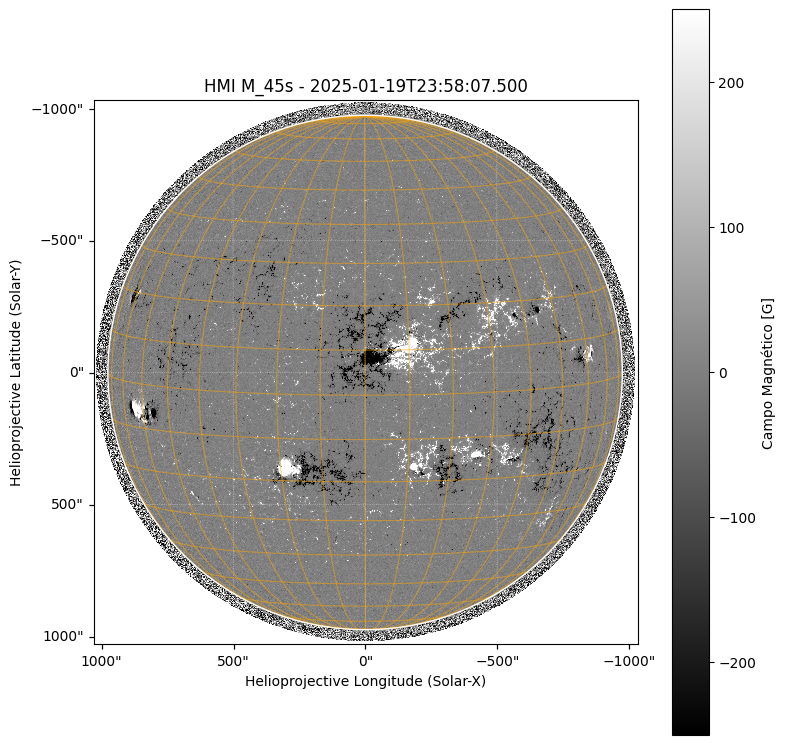

In [ ]:
import sunpy.map
import matplotlib.pyplot as plt
from sunpy.coordinates import frames
import matplotlib.colors as colors
from astropy import units as u
norm = colors.Normalize(vmin=-250, vmax=250)

# Ahora crear el gráfico
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=magneto_map)

# Plot con normalización personalizada
im = magneto_map.plot(norm=norm, cmap='gray')

# Extra: agregar grilla y limbo solar
magneto_map.draw_grid(grid_spacing=10*u.deg, color='orange')
magneto_map.draw_limb()


# Barra de color y ajustes
plt.colorbar(im, ax=ax, label='Campo Magnético [G]')
plt.title(f"HMI M_45s - {magneto_map.date.isot}")

plt.tight_layout()

plt.show()


In [68]:
t_obs = "2025.01.19_23:59:37_TAI"
series = "hmi.Ic_45s"


# Consulta a JSOC para obtener un magnetograma cercano a esa hora
qstr = f"{series}[{t_obs}]"
print(f"Querying {qstr}")
results, filenames = client.query(qstr, key=drms.JsocInfoConstants.all, seg="continuum")

print(f" -> {len(results)} record(s)")

# Seleccionamos el primer resultado
record = results.iloc[0]
url = f"http://jsoc.stanford.edu{filenames['continuum'][0]}"
print(f"Downloading FITS from: {url}")
data, header = fits.getdata(url, header=True)

# Tamaño del array
ny, nx = data.shape


n_nan = np.isnan(data).sum()
total = data.size

print(header)

Querying hmi.Ic_45s[2025.01.19_23:59:37_TAI]


 -> 1 record(s)
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / data type of original image                    NAXIS   =                    2 / dimension of original image                    NAXIS1  =                 4096 / length of original image axis                  NAXIS2  =                 4096 / length of original image axis                                                                                                                                                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [69]:
export = client.export(qstr, method='url', protocol='fits')
fits_url = export.urls['url'].values[0]
print(fits_url)

# Luego leés ese archivo completo
from astropy.io import fits
data, header = fits.getdata(fits_url, header=True)



2025-04-11 15:49:33 - drms - INFO: Export request pending. [id=JSOC_20250411_012455, status=2]
2025-04-11 15:49:33 - drms - INFO: Waiting for 5 seconds...
2025-04-11 15:49:38 - drms - INFO: Export request pending. [id=JSOC_20250411_012455, status=1]
2025-04-11 15:49:38 - drms - INFO: Waiting for 5 seconds...


http://jsoc.stanford.edu/SUM66/D1863916125/S00000/hmi.ic_45s.20250119_235915_TAI.2.continuum.fits


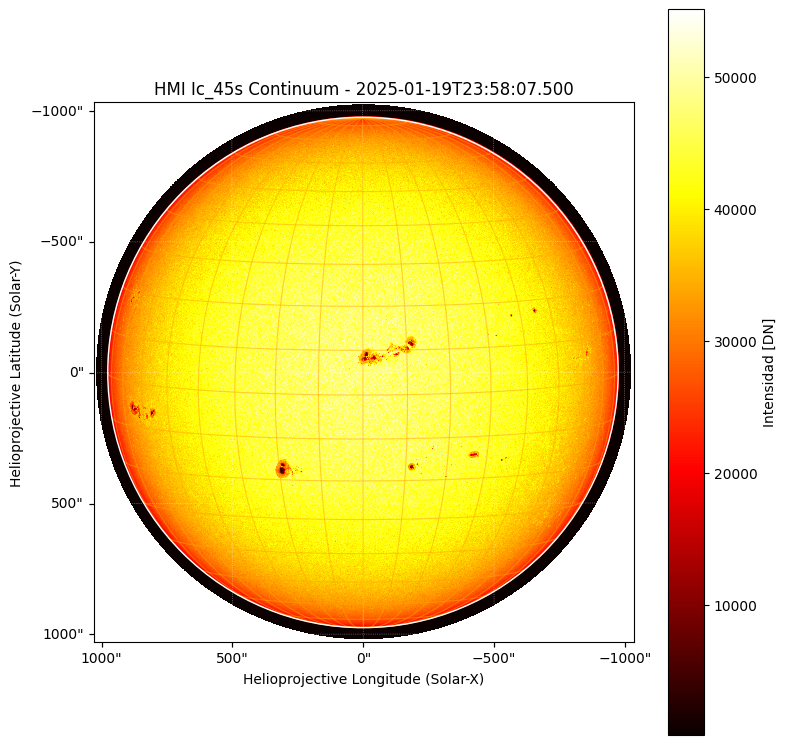

In [90]:
import sunpy.map
import matplotlib.pyplot as plt
from sunpy.coordinates import frames
from astropy import units as u
continuum_map = sunpy.map.Map(data, header)
# Crear figura y ejes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=continuum_map)

# Mostrar la imagen (sin normalización forzada, el rango de intensidades depende del instrumento)
im = continuum_map.plot(cmap='hot')
# Grilla y limbo
continuum_map.draw_grid(grid_spacing=10*u.deg, color='orange')
continuum_map.draw_limb()

# Barra de color
plt.colorbar(im, ax=ax, label='Intensidad [DN]')  # DN: Data Numbers
plt.title(f"HMI Ic_45s Continuum - {continuum_map.date.isot}")
plt.tight_layout()
plt.show()

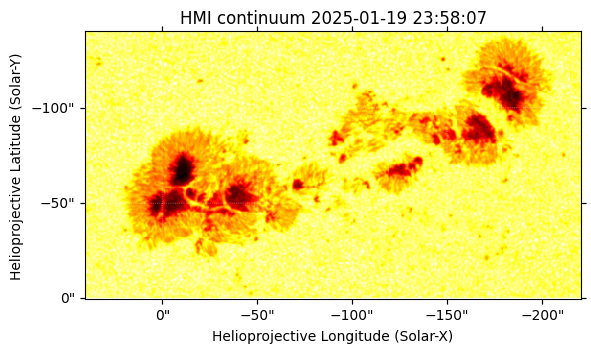

In [100]:
from astropy.coordinates import SkyCoord
roi_bottom_left = SkyCoord(-220 * u.arcsec, -140 * u.arcsec, frame=continuum_map.coordinate_frame)
roi_top_right = SkyCoord(40 * u.arcsec, 0 * u.arcsec, frame=continuum_map.coordinate_frame)
my_submap = continuum_map.submap(roi_bottom_left, top_right=roi_top_right)
fig = plt.figure()
ax = fig.add_subplot(projection=my_submap)
my_submap.plot(axes=ax, cmap="hot")
plt.show()

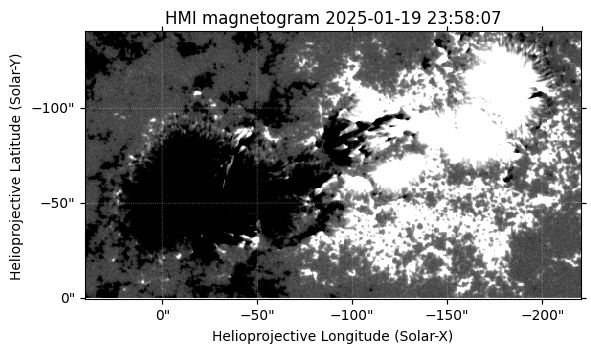

In [99]:
from astropy.coordinates import SkyCoord

roi_bottom_left = SkyCoord(-220 * u.arcsec, -140 * u.arcsec, frame=magneto_map.coordinate_frame)
roi_top_right = SkyCoord(40 * u.arcsec, 0 * u.arcsec, frame=magneto_map.coordinate_frame)
my_submap = magneto_map.submap(roi_bottom_left, top_right=roi_top_right)
fig = plt.figure()
ax = fig.add_subplot(projection=my_submap)
my_submap.plot(axes=ax, norm=norm)
plt.show()